In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
dataset = pd.read_csv("DigitalAd_dataset.csv")

In [6]:
dataset.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [7]:
dataset.shape

(400, 3)

In [9]:
dataset.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


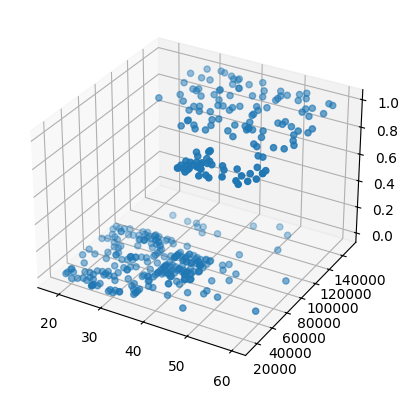

In [ ]:
fig = plt.figure()
plot = fig.add_subplot(111, projection="3d")
plot.scatter(dataset["Age"], dataset["Salary"], dataset['Status'])
plot.title(2)

In [17]:
X = dataset.iloc[:,:-1]
Y = dataset["Status"]

In [34]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


In [ ]:
fig = plt.figure()
plot = fig.add_subplot(111, projection="3d")
plot.scatter(dataset['Age'], dataset["Salary"], dataset["Status"])
plt.title("3D view of Purchases based on Age and Salary")
plot.set_xlabel("Age")
plot.set_ylabel("salary")
plot.set_zlabel("status")

In [18]:
print(X)

     Age  Salary
0     18   82000
1     29   80000
2     47   25000
3     45   26000
4     46   28000
..   ...     ...
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000

[400 rows x 2 columns]


In [19]:
print(Y)

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


In [25]:
print(Y_train.shape)
print(Y_test.shape)

(320,)
(80,)
